In [23]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import title,subplot,figure
import os
import sys
import seaborn as sns
import tak.tak as tw

In [2]:
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.size'] = 44.0

mpl.rcParams['figure.edgecolor'] = 'black' # <- noeffect
mpl.rcParams['axes.labelsize']=24.0
mpl.rcParams['axes.titlesize']=24.0
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14

# see below for the properties that we can modify
#mpl.rcParams


In [3]:
tips = sns.load_dataset("tips")

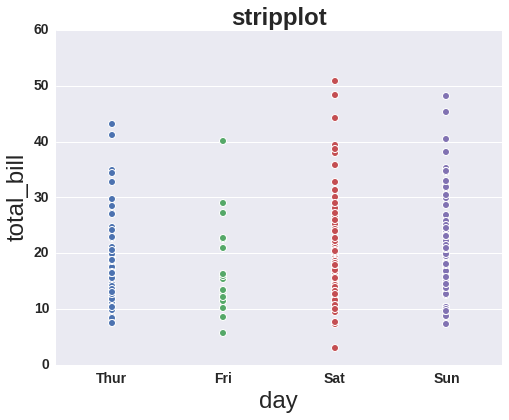

In [4]:
figure()
sns.stripplot(x="day", y="total_bill", data=tips)
title('stripplot')

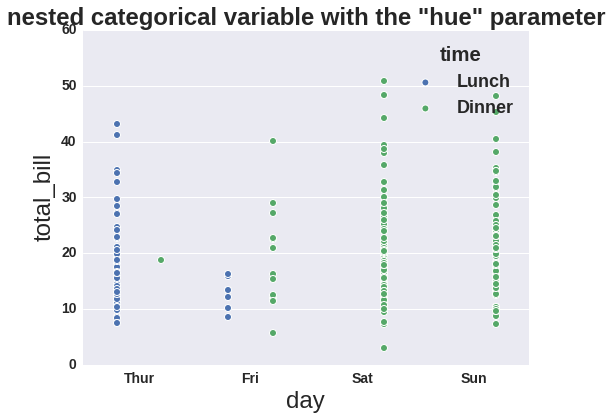

In [5]:
# nested categorical variable with the "hue" parameter
figure()
sns.stripplot(x="day", y="total_bill", hue="time", data=tips);
title('nested categorical variable with the "hue" parameter')

# Snippets begins here

In [6]:
#** AWESOME!!! MEMORY USAGE ALSO PRINTED OUT!!!
print tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 8.7 KB
None


In [7]:
# pandas: different ways of boolean selection
tips[ tips['sex'].isin(['Female'])].describe() 
tips[ tips['sex'] == 'Female' ].describe()
tips.query('sex == "Female"').describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


# More practice with query

In [8]:
# query will do the column selection for you! (so won't return boolean DF)
tips.query('sex == "Male"').describe().T
tips.query('sex != "Male"').describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,87,18.056897,8.009209,3.07,12.75,16.40,21.52,44.3
tip,87,2.833448,1.159495,1.00,2.00,2.75,3.50,6.5
size,87,2.459770,0.937644,1.00,2.00,2.00,3.00,6.0


In [9]:
# get all rows where columns "a" and "b" have overlapping values
tips.query('sex in smoker')      # <- concise and readable
tips[tips.sex.isin(tips.smoker)] # equivalent pythonic syntax...

tips.query('sex not in smoker')
tips[~tips.sex.isin(tips.smoker)] # equivalent pythonic syntax...

tips.query('sex == "Female" and tip < 3.5')
tips.query('sex == "Female" and smoker == "Yes"')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
103,22.42,3.48,Female,Yes,Sat,Dinner,2
109,14.31,4.00,Female,Yes,Sat,Dinner,2


In [10]:
# list-expressions also works in query
tips.query('sex == "Male" and day in ["Sun","Sat"]')
tips.query('sex in "Male" and day == ["Sun","Sat"]')
tips.query('sex == "Male" and day not in ["Sun","Sat"]')
tips.query('sex == "Male" and day != ["Sun","Sat"]')

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
84,15.98,2.03,Male,No,Thur,Lunch,2
86,13.03,2.00,Male,No,Thur,Lunch,2
87,18.28,4.00,Male,No,Thur,Lunch,2
88,24.71,5.85,Male,No,Thur,Lunch,2


# Multi-indexing

In [11]:
# original structure
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [12]:
# make gender an outer level index
tips_multi_index = tips.set_index('sex', append=True)
tips_multi_index.head(3)

,,total_bill,tip,smoker,day,time,size
,sex,,,,,,
0,Female,16.99,1.01,No,Sun,Dinner,2
1,Male,10.34,1.66,No,Sun,Dinner,3
2,Male,21.01,3.50,No,Sun,Dinner,3


In [13]:
# name the original index as "id"
tips_multi_index.index.rename(['id','sex'], inplace=True)
tips_multi_index.head(3)

,,total_bill,tip,smoker,day,time,size
id,sex,,,,,,
0,Female,16.99,1.01,No,Sun,Dinner,2
1,Male,10.34,1.66,No,Sun,Dinner,3
2,Male,21.01,3.50,No,Sun,Dinner,3


In [14]:
#==============================================================================
# Note: really weird, but to make index into column, use reset_index
# http://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column
#==============================================================================
print tips.equals( tips_multi_index.reset_index('sex',col_level = 3))
print ("we got false above since reset_index will plug the index into the 1st "
       "column (ie, order not preserved)")

False
we got false above since reset_index will plug the index into the 1st column (ie, order not preserved)


In [15]:
#==============================================================================
# Here's where multi-index shines IMO...summary stats based on groups!
#....(but wtf, methods like "describe()" and "quantile" doesn't have "level" arg
#==============================================================================
# using 
tips_multi_index.std(level='sex')

,total_bill,tip,size
sex,,,
Male,9.246469,1.489102,0.955997
Female,8.009209,1.159495,0.937644


## Some sorting by level

In [16]:
# name index as "subject" 
tips_multi_index.index.name = 'subject'

#%% sort/group by gender
print tips_multi_index.sortlevel('sex').head()
print tips_multi_index.sortlevel('sex').tail()

         total_bill   tip smoker  day    time  size
id sex                                             
1  Male       10.34  1.66     No  Sun  Dinner     3
2  Male       21.01  3.50     No  Sun  Dinner     3
3  Male       23.68  3.31     No  Sun  Dinner     2
5  Male       25.29  4.71     No  Sun  Dinner     4
6  Male        8.77  2.00     No  Sun  Dinner     2
            total_bill   tip smoker   day    time  size
id  sex                                                
226 Female       10.09  2.00    Yes   Fri   Lunch     2
229 Female       22.12  2.88    Yes   Sat  Dinner     2
238 Female       35.83  4.67     No   Sat  Dinner     3
240 Female       27.18  2.00    Yes   Sat  Dinner     2
243 Female       18.78  3.00     No  Thur  Dinner     2


In [17]:
tips_multi_index_gender_sorted = tips_multi_index.sortlevel('sex')

In [18]:
# reorder so gender is the outer level (hate how you can't do this in set_index()
tips_multi_index.reorder_levels([1,0]).head(10)
tips_multi_index = tips_multi_index.reorder_levels(['sex','id'])
tips_multi_index.head(3)

total_bill   tip smoker  day    time  size
sex    id                                            
Female 0        16.99  1.01     No  Sun  Dinner     2
Male   1        10.34  1.66     No  Sun  Dinner     3
       2        21.01  3.50     No  Sun  Dinner     3

In [19]:
#%% where vs boolean...
idx1 = tips['sex'].where(tips['sex'] == 'Female') # <- returns a NAN
idx2 = tips['sex'] == 'Female'                    # <- returns True/False

# A bit on "groupby" 

In [20]:
tips.groupby('sex').agg(['count','mean','std',len,np.var])

total_bill                                        tip            \
            count       mean       std  len        var count      mean   
sex                                                                      
Male          157  20.744076  9.246469  157  85.497185   157  3.089618   
Female         87  18.056897  8.009209   87  64.147429    87  2.833448   

                                 size                                     
             std  len       var count      mean       std  len       var  
sex                                                                       
Male    1.489102  157  2.217424   157  2.630573  0.955997  157  0.913931  
Female  1.159495   87  1.344428    87  2.459770  0.937644   87  0.879177

In [21]:
tips.groupby(lambda idx: 0).agg(['count','mean','std',len,np.var])

total_bill                                        tip                      \
       count       mean       std  len        var count      mean       std   
0        244  19.785943  8.902412  244  79.252939   244  2.998279  1.383638   

                  size                                   
   len       var count      mean     std  len       var  
0  244  1.914455   244  2.569672  0.9511  244  0.904591

In [22]:
tips.columns

Index([u'total_bill', u'tip', u'sex', u'smoker', u'day', u'time', u'size'], dtype='object')